### UNI - Name
xb2166 - Xianglong Bai

jt3453 - Jiachen Tang

hy2812 - Haochu Yang

jc6116 - Jiayu Chen

xc2713 - Xinyang Chen

### Data Preprocessing

In [ ]:
! pip install xgboost

     ---------------------------------------- 99.8/99.8 MB 1.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import OrdinalEncoder
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.cluster import DBSCAN
from sklearn.tree import DecisionTreeClassifier

sns.set_style('darkgrid')
%matplotlib inline

In [2]:
df0 = pd.read_csv('credit_risk_dataset.csv')

In [3]:
df0.head()

,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


In [ ]:
df0.shape

(32581, 12)

In [ ]:
# person_age - Age
# person_income - Annual Income
# person_home_ownership - Home ownership
# person_emp_length - Employment length (in years)
# loan_intent - Loan intent
# loan_grade - Loan grade
# loan_amnt - Loan amount
# loan_int_rate - Interest rate
# loan_status - Loan status (0 is non default 1 is default)
# loan_percent_income - Percent income
# cb_person_default_on_file - Historical default
# cb_preson_cred_hist_length - Credit history length

In [ ]:
df0.isna().sum()

person_age                       0
person_income                    0
person_home_ownership            0
person_emp_length              895
loan_intent                      0
loan_grade                       0
loan_amnt                        0
loan_int_rate                 3116
loan_status                      0
loan_percent_income              0
cb_person_default_on_file        0
cb_person_cred_hist_length       0
dtype: int64

In [ ]:
df0.dropna(subset=['person_emp_length','loan_int_rate'],inplace=True) # remove null records

In [ ]:
df0.isna().sum()

person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64

In [ ]:
df0.person_age.describe()

count    28638.000000
mean        27.727216
std          6.310441
min         20.000000
25%         23.000000
50%         26.000000
75%         30.000000
max        144.000000
Name: person_age, dtype: float64

In [ ]:
np.percentile(df0.person_age,99)

50.0

In [ ]:
def detect_outliers(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)

    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    outliers = [x for x in data if x < lower_bound or x > upper_bound]

    return outliers

In [ ]:
len(detect_outliers(df0.person_age))

1298

In [ ]:
len(detect_outliers(df0.person_income))

1329

In [ ]:
len(detect_outliers(df0.person_emp_length))

773

In [ ]:
len(detect_outliers(df0.loan_amnt))

1484

In [ ]:
len(detect_outliers(df0.loan_int_rate))

6

In [ ]:
len(detect_outliers(df0.cb_person_cred_hist_length))

984

In [ ]:
len(detect_outliers(df0.loan_percent_income))

557

In [ ]:
def U_L_bound(data):
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    return lower_bound, upper_bound

In [ ]:
data=df0.person_age
df1 = df0[(U_L_bound(data)[0]<=data)&(data<=U_L_bound(data)[1])].reset_index(drop=True)

In [ ]:
data=df1.person_income
df2 = df1[(U_L_bound(data)[0]<=data)&(data<=U_L_bound(data)[1])].reset_index(drop=True)

In [ ]:
data=df2.person_emp_length
df3 = df2[(U_L_bound(data)[0]<=data)&(data<=U_L_bound(data)[1])].reset_index(drop=True)

In [ ]:
data=df3.loan_amnt
df4 = df3[(U_L_bound(data)[0]<=data)&(data<=U_L_bound(data)[1])].reset_index(drop=True)

In [ ]:
data=df4.loan_int_rate
df5 = df4[(U_L_bound(data)[0]<=data)&(data<=U_L_bound(data)[1])].reset_index(drop=True)

In [ ]:
data=df5.loan_percent_income
df6 = df5[(U_L_bound(data)[0]<=data)&(data<=U_L_bound(data)[1])].reset_index(drop=True)

In [ ]:
df0.shape[0]

28638

In [ ]:
df6.shape[0]

23814

In [ ]:
df6.describe()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,26.541908,58162.194885,4.347149,8398.678298,10.941236,0.200260,0.159341,5.154321
std,4.385584,26535.335811,3.373831,4828.722190,3.190070,0.400204,0.089435,3.234659
min,20.000000,4080.000000,0.000000,500.000000,5.420000,0.000000,0.010000,2.000000
25%,23.000000,38279.000000,2.000000,4950.000000,7.900000,0.000000,0.090000,3.000000
50%,25.000000,54000.000000,4.000000,7500.000000,10.990000,0.000000,0.140000,4.000000
75%,29.000000,74000.000000,7.000000,11500.000000,13.350000,0.000000,0.210000,7.000000
max,40.000000,140900.000000,14.000000,22500.000000,21.360000,1.000000,0.410000,17.000000


In [ ]:
df6.select_dtypes(include=['number']).corr()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_cred_hist_length
person_age,1.000000,0.082157,0.066895,0.034483,0.014607,-0.025083,-0.026837,0.830121
person_income,0.082157,1.000000,0.194422,0.364492,-0.071557,-0.251548,-0.373272,0.051844
person_emp_length,0.066895,0.194422,1.000000,0.095001,-0.074685,-0.091456,-0.064838,0.057678
loan_amnt,0.034483,0.364492,0.095001,1.000000,0.082349,0.057774,0.636671,0.023561
loan_int_rate,0.014607,-0.071557,-0.074685,0.082349,1.000000,0.338456,0.113100,0.019980
loan_status,-0.025083,-0.251548,-0.091456,0.057774,0.338456,1.000000,0.317021,-0.017484
loan_percent_income,-0.026837,-0.373272,-0.064838,0.636671,0.113100,0.317021,1.000000,-0.013909
cb_person_cred_hist_length,0.830121,0.051844,0.057678,0.023561,0.019980,-0.017484,-0.013909,1.000000


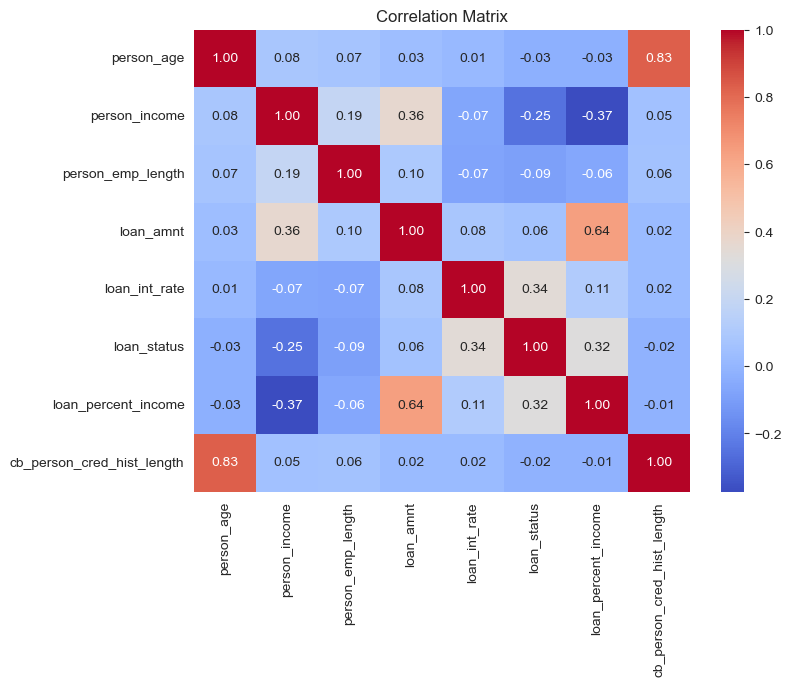

In [ ]:
correlation_matrix = df6.select_dtypes(include=['number']).corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [ ]:
ss = StandardScaler(with_mean=True, with_std=True)

ss.fit(df6[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']])

X_ss = ss.transform(df6[['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length']])

In [ ]:
num_X = pd.DataFrame(X_ss, columns=['person_age','person_income','person_emp_length','loan_amnt','loan_int_rate','loan_percent_income','cb_person_cred_hist_length'])
num_X.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length
0,-1.263691,-1.830134,0.193508,-1.532255,0.062308,-0.663519,-0.975184
1,-1.263691,-1.818828,-0.695707,-1.221607,-1.191609,1.013707,-0.975184
2,-1.263691,-1.815059,0.489914,-1.407996,1.190834,0.007372,-0.666026
3,-0.579618,-1.784910,1.082724,-1.376931,0.015287,0.007372,-0.975184
4,-0.579618,-1.778127,-1.288517,-1.428706,-1.144587,-0.216258,-0.666026


In [ ]:
sub_df1 = pd.get_dummies(df6.person_home_ownership, prefix='person_home_ownership') # do one-hot here

In [ ]:
sub_df2 = pd.get_dummies(df6.loan_intent, prefix='loan_intent')

In [ ]:
sub_df3 = pd.get_dummies(df6.cb_person_default_on_file, prefix='cb_person_default_on_file')

In [ ]:
cat_X_onehot = pd.concat([sub_df1,sub_df2,sub_df3],axis=1)
cat_X_onehot.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y
0,0,0,1,0,0,1,0,0,0,0,1,0
1,0,0,1,0,0,0,0,0,0,1,1,0
2,0,0,1,0,0,0,0,0,0,1,1,0
3,1,0,0,0,0,1,0,0,0,0,1,0
4,0,0,1,0,0,0,0,0,1,0,1,0


In [ ]:
encoder = OrdinalEncoder()

ordinal_encoded = encoder.fit_transform(df6[['loan_grade']])

ordinal_series = pd.Series(ordinal_encoded.flatten(), name='loan_grade')

cat_X = pd.concat([cat_X_onehot, ordinal_series], axis=1)

In [ ]:
cat_X.loan_grade = cat_X.loan_grade.astype('int')

In [ ]:
cat_X.head()

,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,person_home_ownership_RENT,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade
0,0,0,1,0,0,1,0,0,0,0,1,0,1
1,0,0,1,0,0,0,0,0,0,1,1,0,0
2,0,0,1,0,0,0,0,0,0,1,1,0,3
3,1,0,0,0,0,1,0,0,0,0,1,0,1
4,0,0,1,0,0,0,0,0,1,0,1,0,0


In [ ]:
Y = df6.loc[:,['loan_status']]

In [ ]:
Y.head()

,loan_status
0,0
1,1
2,1
3,1
4,0


In [ ]:
Data = pd.concat([num_X,cat_X,Y],axis=1)
Data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade,loan_status
0,-1.263691,-1.830134,0.193508,-1.532255,0.062308,-0.663519,-0.975184,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,-1.263691,-1.818828,-0.695707,-1.221607,-1.191609,1.013707,-0.975184,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2,-1.263691,-1.815059,0.489914,-1.407996,1.190834,0.007372,-0.666026,0,0,1,...,0,0,0,0,0,1,1,0,3,1
3,-0.579618,-1.784910,1.082724,-1.376931,0.015287,0.007372,-0.975184,1,0,0,...,0,1,0,0,0,0,1,0,1,1
4,-0.579618,-1.778127,-1.288517,-1.428706,-1.144587,-0.216258,-0.666026,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
Data.to_csv('STAT 5291 Group Project - Pre-processed Dataset for Training and Testing.csv')

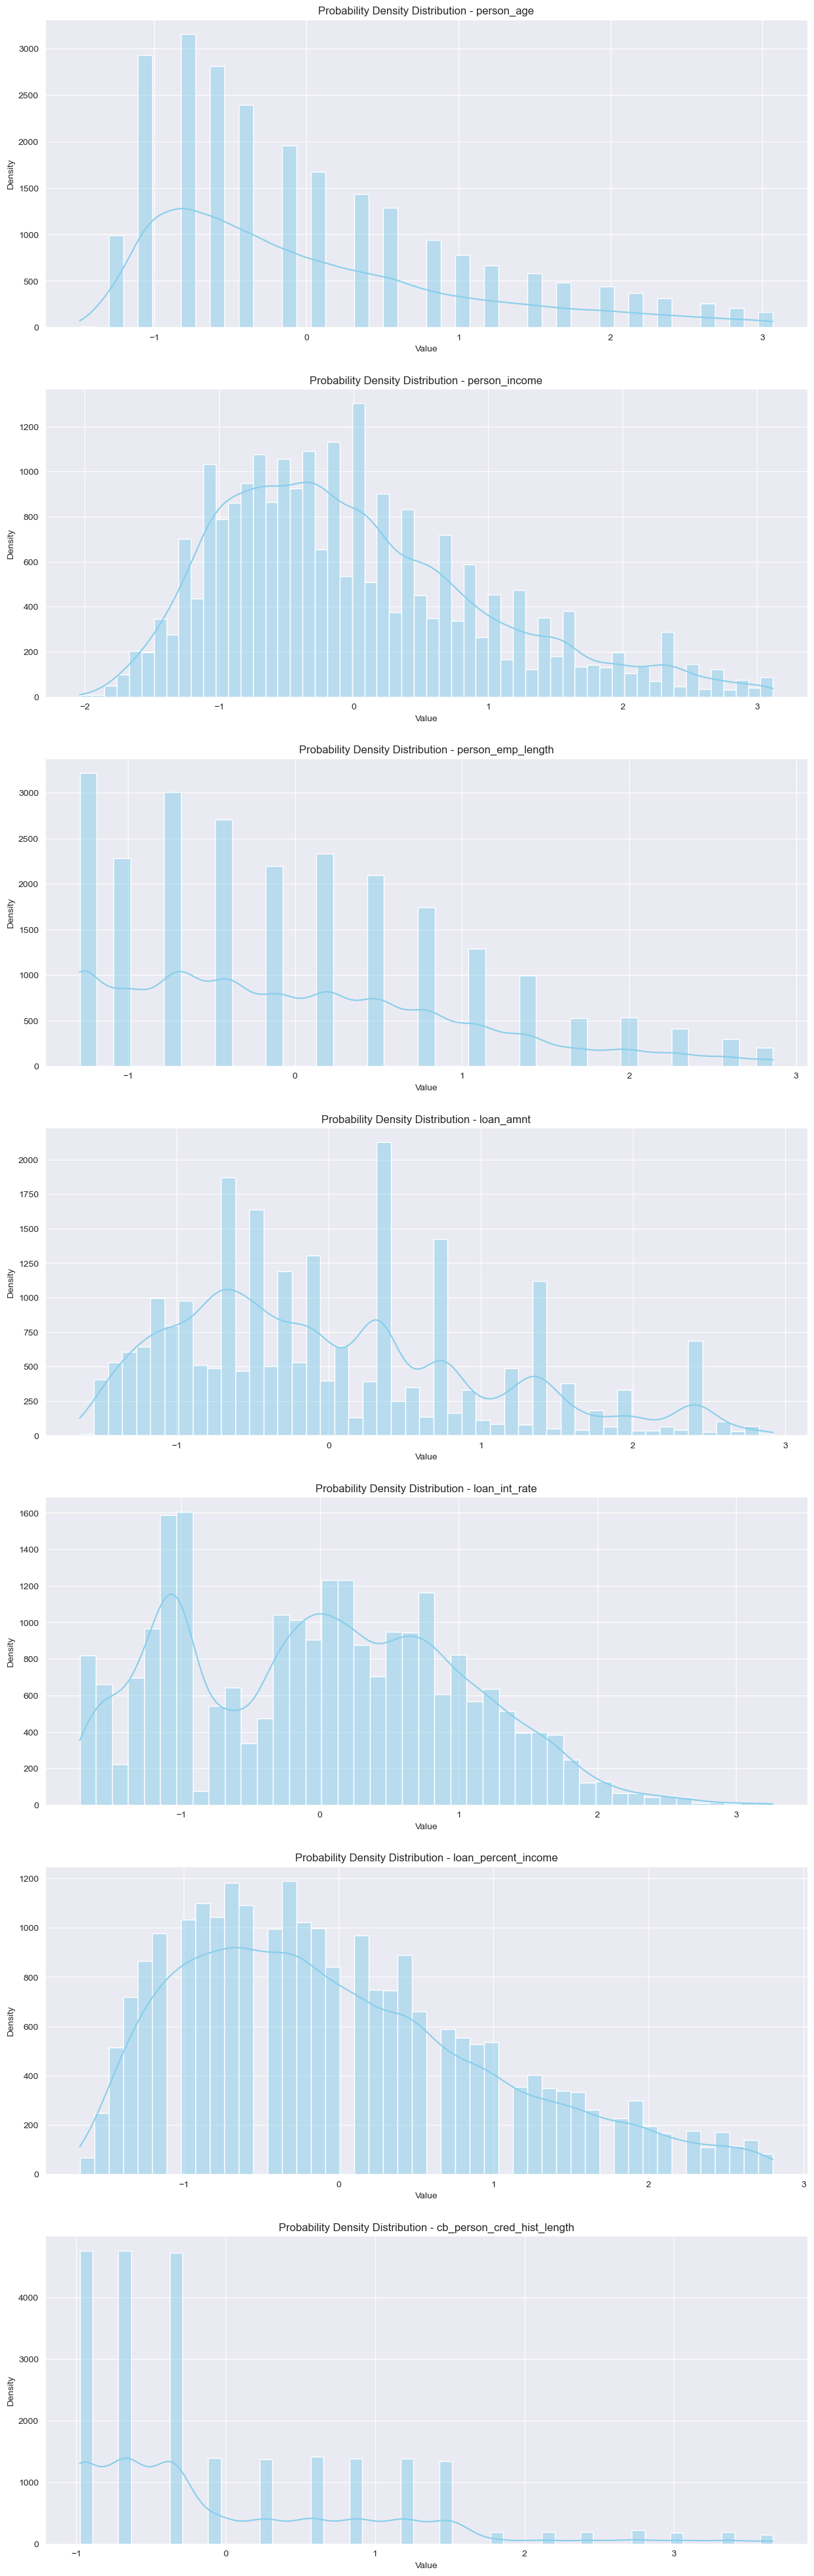

In [ ]:
fig, axes = plt.subplots(nrows=len(num_X.columns), ncols=1, figsize=(15, 50))

for i, column in enumerate(num_X.columns):
    sns.histplot(num_X[column], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Probability Density Distribution - {column}')
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Density')

plt.show()

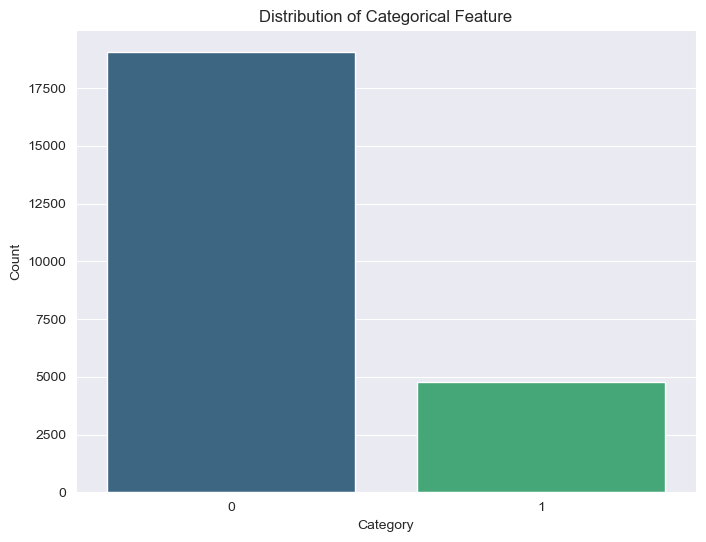

In [ ]:
category_counts = df6['loan_status'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Categorical Feature')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

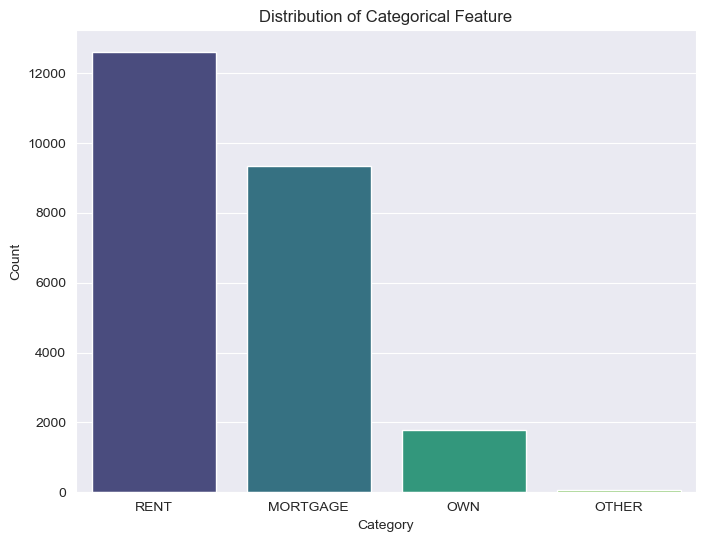

In [ ]:
category_counts = df6['person_home_ownership'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Categorical Feature')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

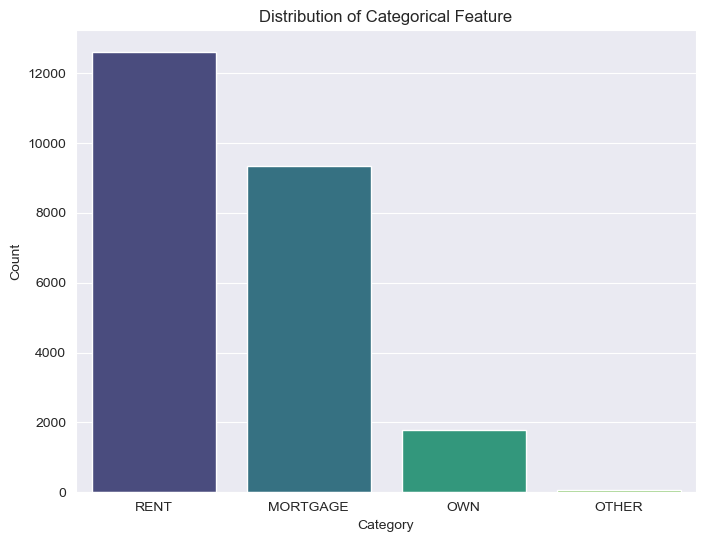

In [ ]:
category_counts = df6['person_home_ownership'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Categorical Feature')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

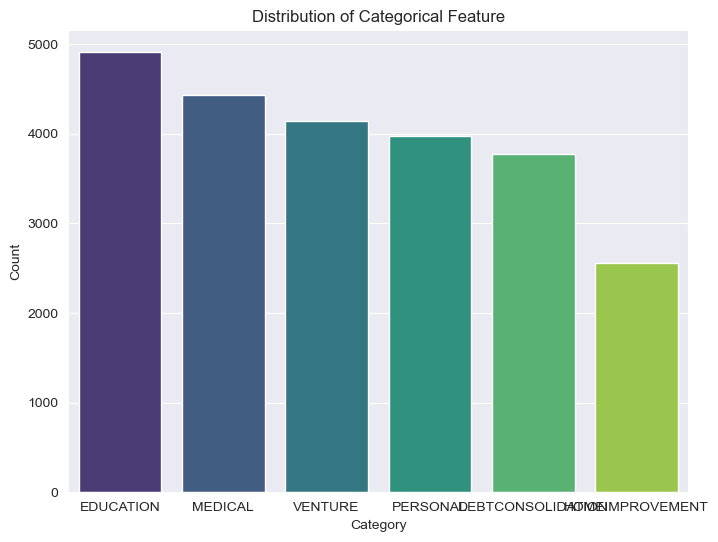

In [ ]:
category_counts = df6['loan_intent'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Categorical Feature')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

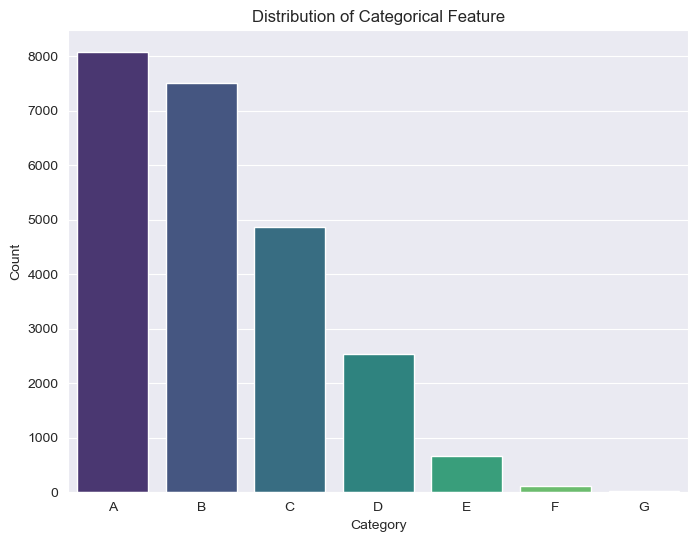

In [ ]:
category_counts = df6['loan_grade'].value_counts()

plt.figure(figsize=(8, 6))
sns.barplot(x=category_counts.index, y=category_counts.values, palette='viridis')
plt.title('Distribution of Categorical Feature')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

### KNN

In [ ]:
Data.head()

,person_age,person_income,person_emp_length,loan_amnt,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,person_home_ownership_MORTGAGE,person_home_ownership_OTHER,person_home_ownership_OWN,...,loan_intent_DEBTCONSOLIDATION,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,cb_person_default_on_file_N,cb_person_default_on_file_Y,loan_grade,loan_status
0,-1.263691,-1.830134,0.193508,-1.532255,0.062308,-0.663519,-0.975184,0,0,1,...,0,1,0,0,0,0,1,0,1,0
1,-1.263691,-1.818828,-0.695707,-1.221607,-1.191609,1.013707,-0.975184,0,0,1,...,0,0,0,0,0,1,1,0,0,1
2,-1.263691,-1.815059,0.489914,-1.407996,1.190834,0.007372,-0.666026,0,0,1,...,0,0,0,0,0,1,1,0,3,1
3,-0.579618,-1.784910,1.082724,-1.376931,0.015287,0.007372,-0.975184,1,0,0,...,0,1,0,0,0,0,1,0,1,1
4,-0.579618,-1.778127,-1.288517,-1.428706,-1.144587,-0.216258,-0.666026,0,0,1,...,0,0,0,0,1,0,1,0,0,0


In [ ]:
# KNN

X = Data.iloc[:,:-1]
y = Data.iloc[:,-1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

# Define the KNN classifier
knn = KNeighborsClassifier()

# Define the hyperparameters to tune
param_grid = {'n_neighbors': np.arange(1, 21), 'weights': ['uniform', 'distance']}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(knn, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_knn = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_knn.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best hyperparameters: {'n_neighbors': 12, 'weights': 'distance'}
Accuracy on test set: 0.8979634684022675


### XGBoost

In [ ]:
# XGBoost

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the XGBoost classifier
xgb_model = xgb.XGBClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [3, 4, 5, 6, 7, 8],
    'learning_rate': [0.2, 0.1, 0.01, 0.001]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(xgb_model, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_xgb_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_xgb_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 100}
Accuracy on test set: 0.9277766113793827


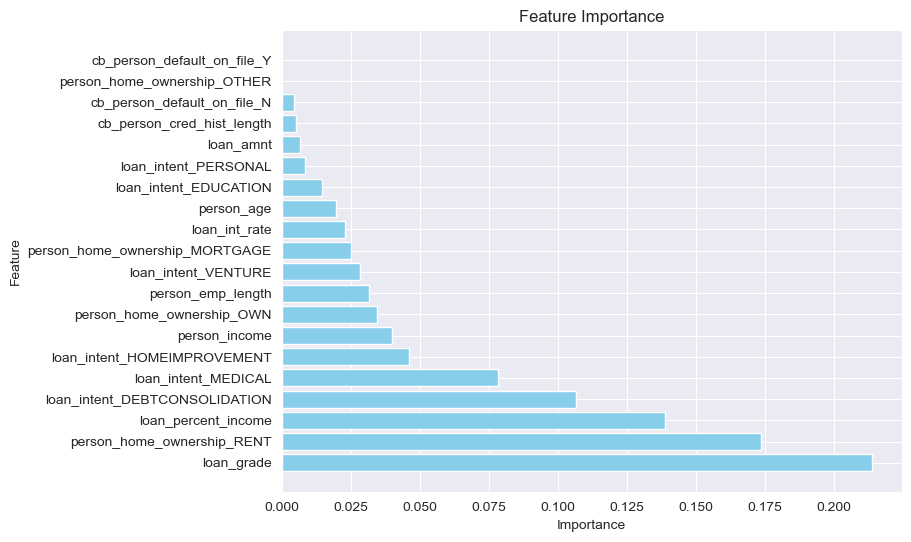

In [ ]:
# Get feature importances
feature_importances = best_xgb_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

### Random Forest

In [ ]:
# Random Forest

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the Random Forest classifier
rf_classifier = RandomForestClassifier()

# Define the hyperparameters to tune
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Perform grid search cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5)
grid_search.fit(X_train, y_train)

# Print the best hyperparameters found
print("Best hyperparameters:", grid_search.best_params_)

# Get the best model
best_rf_model = grid_search.best_estimator_

# Evaluate the best model on the test set
y_pred = best_rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy on test set:", accuracy)

Best hyperparameters: {'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 300}
Accuracy on test set: 0.9265169011127441


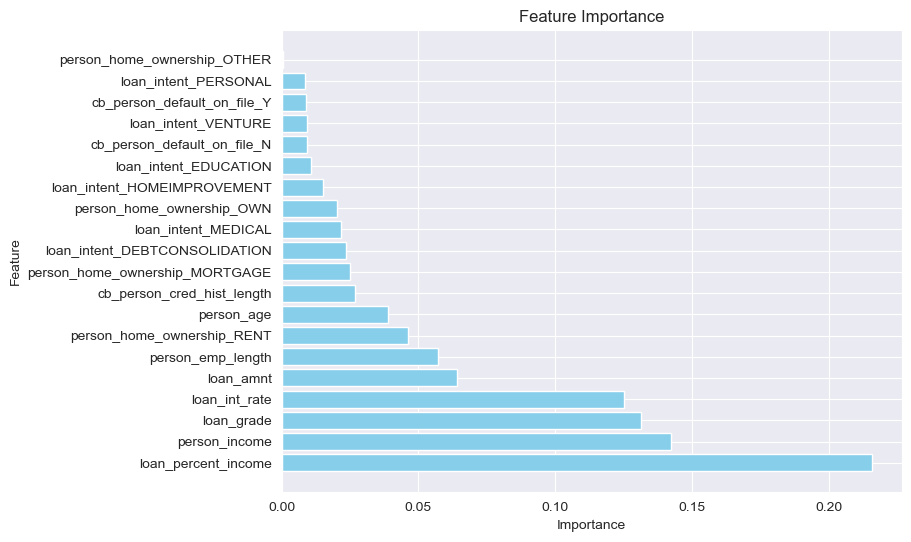

In [ ]:
# Get feature importances
feature_importances = best_rf_model.feature_importances_

# Create a DataFrame to store feature importances
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})

# Sort the DataFrame by feature importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')
plt.show()

In [6]:
data = pd.read_csv('STAT 5291 Group Project - Pre-processed Dataset for Training and Testing.csv')

X = data.drop(columns=['loan_status'])
y = data['loan_status']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### SVM

In [7]:
# Initialize a StandardScaler and scale the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [8]:
param_grid = {
    'C': [0.1, 1, 10],  # Regularization parameter
    'gamma': ['scale', 'auto'],  # Kernel coefficient for 'rbf', 'poly' and 'sigmoid'
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid']  # Type of SVM kernel
}

# Create a GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=42), param_grid, cv=5, scoring='accuracy', verbose=2)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.6s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.8s
[CV] END ..................C=0.1, gamma=scale, kernel=linear; total time=   1.7s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.2s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.1s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.0s
[CV] END .....................C=0.1, gamma=scale, kernel=rbf; total time=   3.1s
[CV] END ....................C=0.1, gamma=scale, kernel=poly; total time=   1.5s
[CV] END ....................C=0.1, gamma=scale

In [9]:
# Train a SVM with the best parameters found
best_svm_model = grid_search.best_estimator_

# Predictions using the best model
y_pred_best = best_svm_model.predict(X_test_scaled)

# Evaluation metrics for the best model
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
classification_rep_best = classification_report(y_test, y_pred_best)

print(f"Accuracy (Best Model): {accuracy_best}")
print("Confusion Matrix (Best Model):")
print(conf_matrix_best)
print("Classification Report (Best Model):")
print(classification_rep_best)

Accuracy (Best Model): 0.9078311988242704
Confusion Matrix (Best Model):
[[3722   68]
 [ 371  602]]
Classification Report (Best Model):
              precision    recall  f1-score   support

           0       0.91      0.98      0.94      3790
           1       0.90      0.62      0.73       973

    accuracy                           0.91      4763
   macro avg       0.90      0.80      0.84      4763
weighted avg       0.91      0.91      0.90      4763



([<matplotlib.axis.YTick at 0x13d0e8bc8b0>,
 [Text(0, 0.5, 'Non-Default (0)'), Text(0, 1.5, 'Default (1)')])

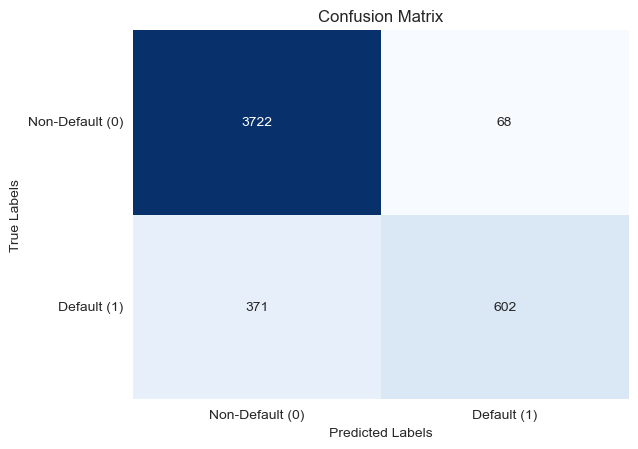

In [10]:
# Confusion Matrix
sns.heatmap(conf_matrix_best, annot=True, fmt="d", cmap="Blues", cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=[0.5, 1.5], labels=['Non-Default (0)', 'Default (1)'])
plt.yticks(ticks=[0.5, 1.5], labels=['Non-Default (0)', 'Default (1)'], rotation=0)

In [11]:
# Perform 5-fold cross-validation
scores = cross_val_score(best_svm_model, X_train_scaled, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold
print("Accuracy scores for each fold:")
print(scores)
print("Mean accuracy:", scores.mean())
print("Standard deviation of accuracy:", scores.std())

Accuracy scores for each fold:
[0.91734453 0.90813648 0.92572178 0.91548556 0.90708661]
Mean accuracy: 0.914754995037848
Standard deviation of accuracy: 0.006784079336628784


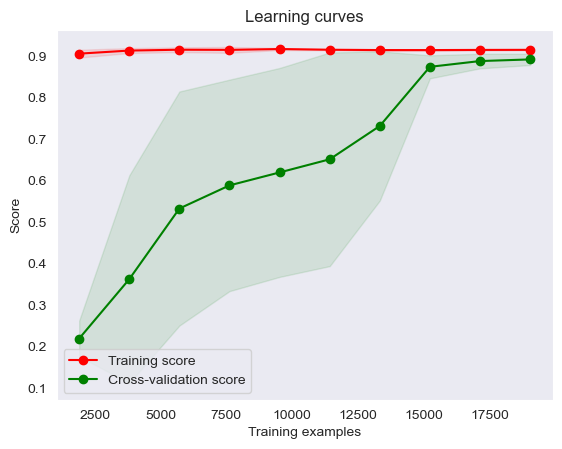

In [12]:
# Create a pipeline with StandardScaler and SVC
pipeline = make_pipeline(StandardScaler(), SVC(kernel='rbf', random_state=42))

# Function to plot learning curves
def plot_learning_curves(model, X, y, cv=5):
    train_sizes, train_scores, validation_scores = learning_curve(
        estimator=model,
        X=X,
        y=y,
        train_sizes=np.linspace(0.1, 1.0, 10),
        cv=cv,
        scoring='accuracy',
        n_jobs=-1
    )
    # Calculate mean and standard deviation for training and validation scores
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    validation_scores_mean = np.mean(validation_scores, axis=1)
    validation_scores_std = np.std(validation_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color='r')
    plt.fill_between(train_sizes, validation_scores_mean - validation_scores_std,
                     validation_scores_mean + validation_scores_std, alpha=0.1, color='g')
    plt.plot(train_sizes, train_scores_mean, 'o-', color='r', label='Training score')
    plt.plot(train_sizes, validation_scores_mean, 'o-', color='g', label='Cross-validation score')

    plt.title('Learning curves')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.legend(loc='best')
    plt.grid()
    plt.show()

plot_learning_curves(pipeline, X, y)

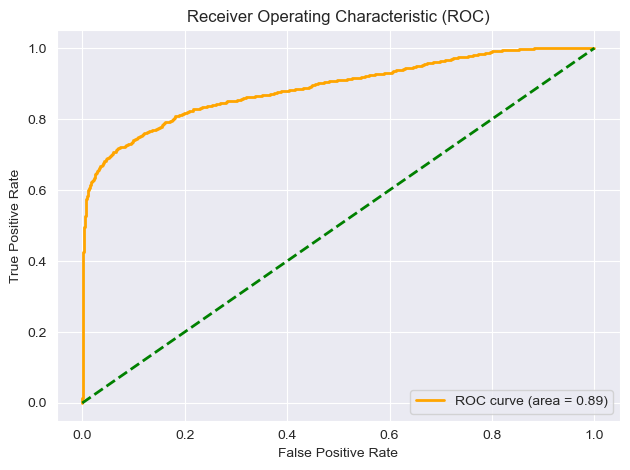

In [13]:
# ROC Curve
fpr, tpr, thresholds = roc_curve(y_test, best_svm_model.decision_function(X_test_scaled))
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, color='orange', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='green', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()

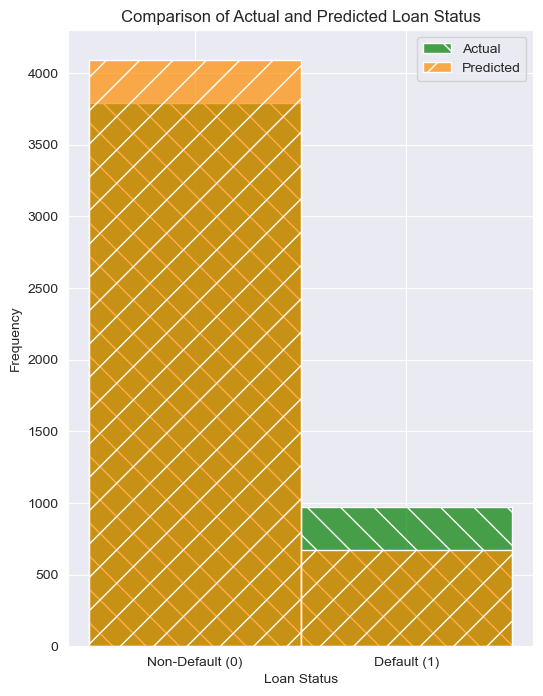

In [14]:
plt.figure(figsize=(6, 8))
sns.histplot(y_test, bins=np.arange(-0.5, 2.5, 1), kde=False, label='Actual', color='green', alpha=0.7, hatch='\\')
sns.histplot(y_pred_best, bins=np.arange(-0.5, 2.5, 1), kde=False, label='Predicted', color='darkorange', alpha=0.7, hatch='/')
plt.xticks(ticks=[0, 1], labels=['Non-Default (0)', 'Default (1)'])
plt.xlabel('Loan Status')
plt.ylabel('Frequency')
plt.title('Comparison of Actual and Predicted Loan Status')
plt.legend()
plt.show()

### Linear Regression

In [15]:
lr_model = LogisticRegression(max_iter=10000)
lr_model.fit(X_train, y_train)
y_pred = lr_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.8437959269368045

In [16]:
report_dict = classification_report(y_test, y_pred, output_dict=True)
class_report = pd.DataFrame(report_dict).transpose()
class_report = class_report.round(2)
class_report

,precision,recall,f1-score,support
0,0.87,0.95,0.91,3790.00
1,0.68,0.44,0.54,973.00
accuracy,0.84,0.84,0.84,0.84
macro avg,0.78,0.69,0.72,4763.00
weighted avg,0.83,0.84,0.83,4763.00


In [17]:
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix_df = pd.DataFrame(conf_matrix,
                              index=['True Negative', 'True Positive'],
                              columns=['Predicted Negative', 'Predicted Positive'])
conf_matrix_df

,Predicted Negative,Predicted Positive
True Negative,3590,200
True Positive,544,429


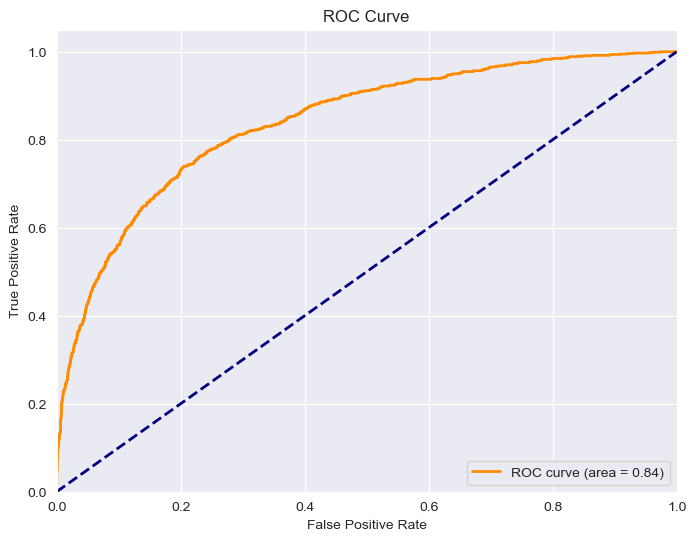

0.8396570192018267

In [18]:
#Roc Curve, auc
y_pred_proba = lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)


plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")
plt.show()

roc_auc

In [19]:
#hyperparameter tunning

model = LogisticRegression(solver='liblinear')
param_grid = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000],
    'penalty': ['l1', 'l2']  }


grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=10, scoring='accuracy', verbose=1)
grid_result = grid_search.fit(X_train, y_train)
print("Best accruacy: %f using %s" % (grid_result.best_score_, grid_result.best_params_))

# Use the best estimator model to make predictions
best_model = grid_result.best_estimator_
y_pred = best_model.predict(X_test)

Fitting 10 folds for each of 14 candidates, totalling 140 fits
Best accruacy: 0.858118 using {'C': 1, 'penalty': 'l1'}


In [20]:
#Cross Validation
from sklearn.model_selection import cross_val_score, cross_validate

cv_results = cross_validate(lr_model, X, y, cv=10, scoring=['accuracy', 'precision', 'recall', 'f1'])


cv_accuracy = cv_results['test_accuracy'].mean(), cv_results['test_accuracy'].std()
cv_precision = cv_results['test_precision'].mean(), cv_results['test_precision'].std()
cv_recall = cv_results['test_recall'].mean(), cv_results['test_recall'].std()
cv_f1 = cv_results['test_f1'].mean(), cv_results['test_f1'].std()

cv_accuracy, cv_precision, cv_recall, cv_f1

((0.8335011183907305, 0.028805180165446493),
 (0.6611183326528971, 0.12058318784061992),
 (0.4577268643306379, 0.12761375802928032),
 (0.5191220485345829, 0.05309128142607316))

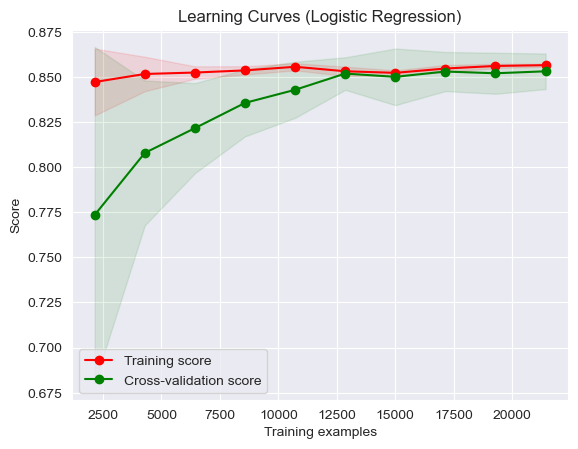

In [21]:
# Define the optimal model
best_model = LogisticRegression(max_iter=10000, C=1000, penalty='l1', solver='liblinear')
best_model.fit(X, y)

# Function to plot learning curves
def plot_learning_curve(estimator, title, X, y, cv=None, n_jobs=None, train_sizes=np.linspace(.1, 1.0, 10)):
    plt.figure()
    plt.title(title)
    plt.xlabel("Training examples")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    plt.grid(True)
    plt.show()


plot_learning_curve(best_model, 'Learning Curves (Logistic Regression)', X, y, cv=10)

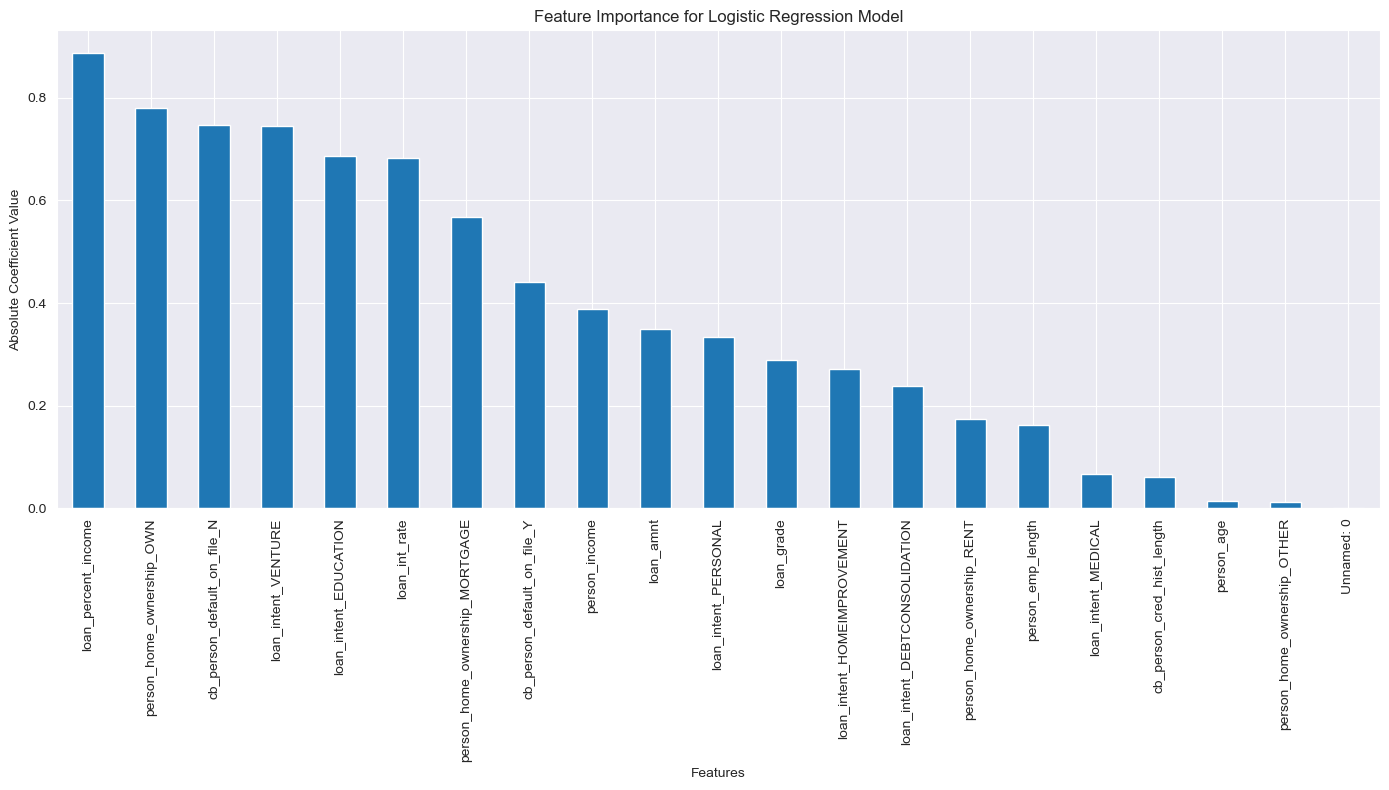

In [22]:
#Feature Importance
feature_importance = pd.Series(lr_model.coef_[0], index=X.columns)
feature_importance = feature_importance.abs().sort_values(ascending=False)


plt.figure(figsize=(14, 8))
feature_importance.plot(kind='bar')
plt.title('Feature Importance for Logistic Regression Model')
plt.xlabel('Features')
plt.ylabel('Absolute Coefficient Value')
plt.xticks(rotation=90)
plt.tight_layout()

plt.show()

### Decision Tree

In [23]:
dt_classifier = DecisionTreeClassifier(random_state=42)
dt_classifier.fit(X_train, y_train)
y_pred = dt_classifier.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print("Accuracy:", accuracy)
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", class_report)

Accuracy: 0.8922947722023935
Confusion Matrix:
 [[3526  264]
 [ 249  724]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.93      0.93      3790
           1       0.73      0.74      0.74       973

    accuracy                           0.89      4763
   macro avg       0.83      0.84      0.84      4763
weighted avg       0.89      0.89      0.89      4763



In [25]:
! pip install graphviz

     ---------------------------------------- 47.1/47.1 kB 2.5 MB/s eta 0:00:00


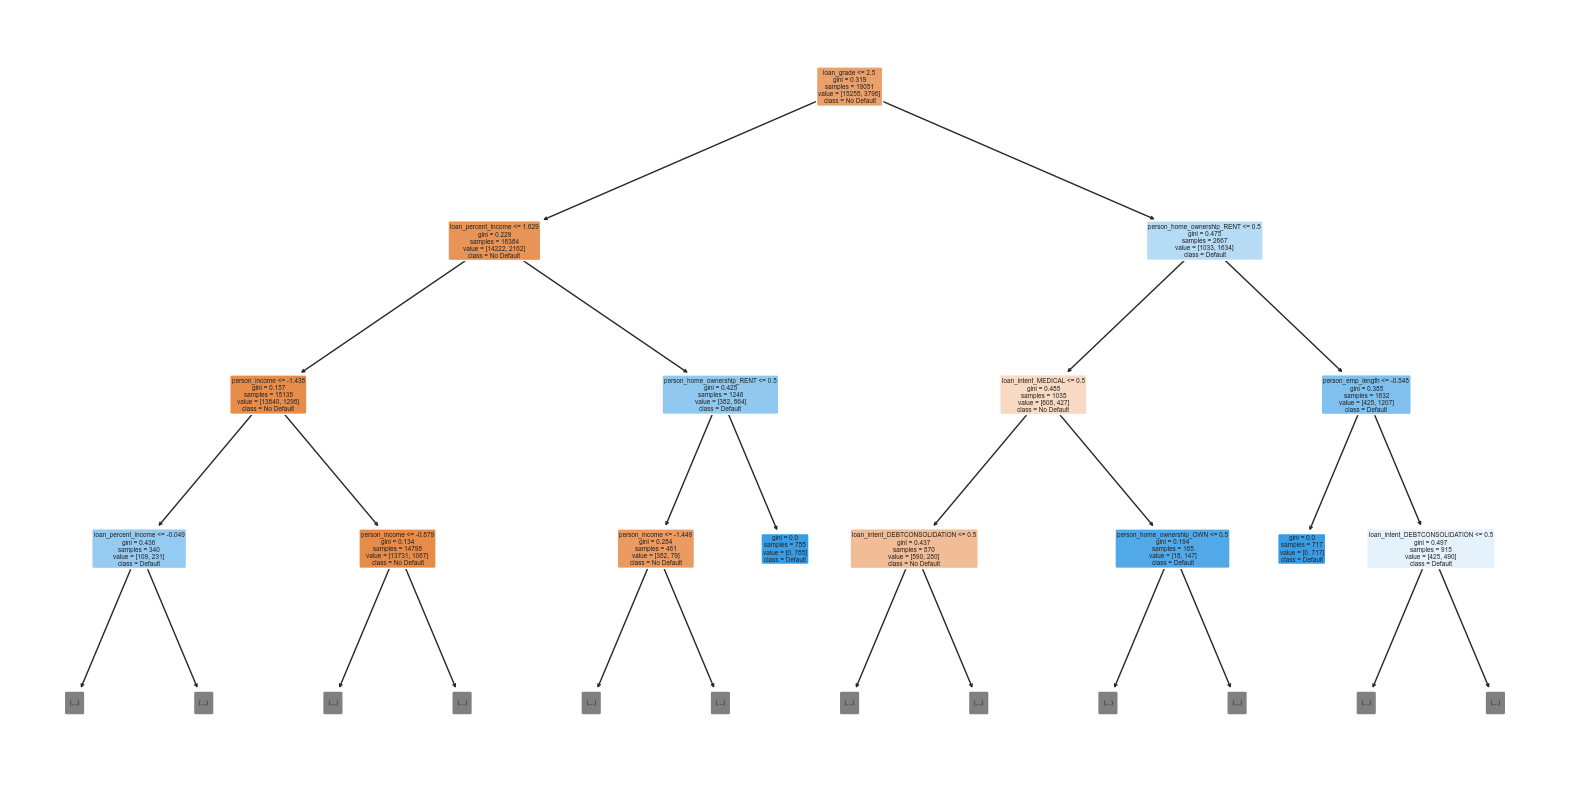

In [28]:
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Assuming your decision tree classifier is named dt_classifier and is already trained
plt.figure(figsize=(20,10))  # Set the size of the figure for the tree visualization
plot_tree(dt_classifier, 
          feature_names=X.columns, 
          class_names=['No Default', 'Default'], 
          filled=True, rounded=True, 
          max_depth=3)
plt.show()  # Display the tree diagram

In [27]:
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

cross_val_scores = cross_val_score(dt, X, y, cv=5)

param_grid = {
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 10, 20],
    'min_samples_leaf': [1, 5, 10]
}

grid_search = GridSearchCV(dt, param_grid, cv=5, scoring='accuracy')

grid_search.fit(X, y)

best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Cross-validation scores:", cross_val_scores)
print("Best cross-validation score:", best_score)
print("Best parameters:", best_params)

best_dt = grid_search.best_estimator_

Cross-validation scores: [0.20764224 0.60277136 0.79970607 0.79886626 0.86371273]
Best cross-validation score: 0.7791694042247646
Best parameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 10}


### Result

In [29]:
import pandas as pd
from IPython.display import display


data = {
    'Algorithm': [
        'Logistic regression (LR)',
        'Decision tree (DT)',
        'K-nearest neighbors (KNN)',
        'Support vector machines (SVM)',
        'Random forests (RF)',
        'XGBoost (XGB)'
    ],
    'Hyperparameter': [
        'class_weight="balanced", C=100',
        'max_depth=10, min_samples_leaf=1, min_samples_split=10',
        'n_neighbors=12, class_weight="distance"',
        'kernel="rbf", gamma="scale", C=10',
        'max_depth=20, min_samples_leaf=1, min_samples_split=5, n_estimators=300',
        'learning_rate=0.1, max_depth=5, n_estimators=100'
    ]
}


df = pd.DataFrame(data)


display(df)

,Algorithm,Hyperparameter
0,Logistic regression (LR),"class_weight=""balanced"", C=100"
1,Decision tree (DT),"max_depth=10, min_samples_leaf=1, min_samples_..."
2,K-nearest neighbors (KNN),"n_neighbors=12, class_weight=""distance"""
3,Support vector machines (SVM),"kernel=""rbf"", gamma=""scale"", C=10"
4,Random forests (RF),"max_depth=20, min_samples_leaf=1, min_samples_..."
5,XGBoost (XGB),"learning_rate=0.1, max_depth=5, n_estimators=100"


In [31]:
data1 = {
    'Algorithm': [
        'Logistic regression (LR)',
        'Decision tree (DT)',
        'K-nearest neighbors (KNN)',
        'Support vector machines (SVM)',
        'Random forests (RF)',
        'XGBoost (XGB)'
    ],
    'Best Cross Validation Score': [
        '0.8551',
        '0.7791',
        '0.8979',
        '0.9162',
        '0.9265',
        '0.9277'
    ]
}

df1 = pd.DataFrame(data1)
df1

,Algorithm,Best Cross Validation Score
0,Logistic regression (LR),0.8551
1,Decision tree (DT),0.7791
2,K-nearest neighbors (KNN),0.8979
3,Support vector machines (SVM),0.9162
4,Random forests (RF),0.9265
5,XGBoost (XGB),0.9277


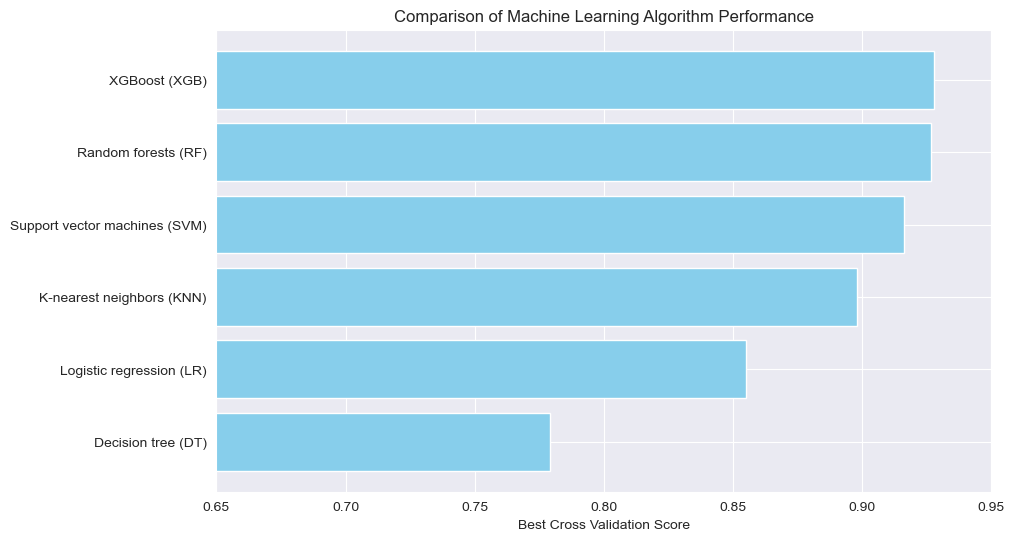

In [32]:
import matplotlib.pyplot as plt
import pandas as pd


data = {
    'Algorithm': ['Logistic regression (LR)', 'Decision tree (DT)', 'K-nearest neighbors (KNN)',
                  'Support vector machines (SVM)', 'Random forests (RF)', 'XGBoost (XGB)'],
    'Best Cross Validation Score': [0.8551, 0.7791, 0.8979, 0.9162, 0.9265, 0.9277]
}


df = pd.DataFrame(data)


df_sorted = df.sort_values(by='Best Cross Validation Score', ascending=False)


plt.figure(figsize=(10, 6))
plt.barh(df_sorted['Algorithm'], df_sorted['Best Cross Validation Score'], color='skyblue')
plt.xlabel('Best Cross Validation Score')
plt.title('Comparison of Machine Learning Algorithm Performance')
plt.xlim(0.65, 0.95)  
plt.gca().invert_yaxis()  
plt.show()

In [ ]:
# Thanks for grading our project report~~~